# WeatherPy

## Analysis

Three observations from the weather data plots of 500 randomly selected cities are:

1. The temperature is highest near latitude zero (the equator), and decreases away from latitude zero in both directions (North & South)

2. There is no regional correlation to % cloudiness or % humidity.

3. The majority of wind speed is less than 15 mph.

In [25]:
# dependencies
import csv
import json
import requests
import random
import time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from citipy import citipy

In [26]:
# create an empty dataframe and name the columns
rand_cities_df = pd.DataFrame(columns=["City",
                                       "Latitude",
                                       "Longitude",
                                       "Temp (F)",
                                       "Humidity (%)",
                                       "Cloudiness (%)",
                                       "Wind Speed (mph)"])

In [27]:
#create a while loop to pull non-duplicate and random cities from citipy


# create a variable for number of cities to sample
sample_size = 500

# create a while loop to run until data frame is length of sample size
while len(rand_cities_df) < sample_size:
    
    # create a for loop that will run until sample number is reached
    for i in range(0, sample_size):
        
        # set random latitude/longitude 
        lat = round(random.uniform(-90.00, 90.00), 9)
        lng = round(random.uniform(-180.00, 180.00), 9)

        # pull nearest city from citipy using random latitude/longitude
        city = citipy.nearest_city(lat, lng)

        # if statement to prevent duplicate cities in data frame
        if city.city_name not in rand_cities_df.City.values:

            # append values for city, latitude and longitude to data frame
            rand_cities_df.set_value(i,"City", city.city_name)
            rand_cities_df.set_value(i, "Latitude", lat)
            rand_cities_df.set_value(i, "Longitude", lng)

        else:
            len(rand_cities_df) < sample_size 

In [28]:
# create a for loop to pull weather data using OpenWeatherMapAPI

# set counter to be used in for loop
row_count = 1

# create a for loop that will run through the data frame
for index, row in rand_cities_df.iterrows():

    # open weather map API key
    api_key = "63e5cd6a894aa41d8d7c50ab4f0fc52f"

    # create endpoint URL
    target_url = "https://api.openweathermap.org/data/2.5/weather" \
    "?lat=%s&lon=%s&units=IMPERIAL&mode=json&APPID=%s" % (row["Latitude"], row["Longitude"], api_key)
    
    # print log to ensure loop is working correctly
    print("Now retrieving city # "+ str(row_count) + " | " + row["City"])
    print(target_url)
    row_count += 1
    
    # run requests to grab the JSON at the requested URL
    city_json = requests.get(target_url).json()
    
    
    # pull the temp, humidity, cloudiness and wind speed from the JSON
    # use try / except to skip any cities with errors
    try:
        temp = city_json["main"]["temp"]
        humidity = city_json["main"]["humidity"]
        cloud = city_json["clouds"]["all"]
        wind = city_json["wind"]["speed"]
        
        # append values for temp, humidity, cloudiness and wind speed to the data frame
        rand_cities_df.set_value(index, "Temp (F)", temp)
        rand_cities_df.set_value(index, "Humidity (%)", humidity)
        rand_cities_df.set_value(index, "Cloudiness (%)", cloud)
        rand_cities_df.set_value(index, "Wind Speed (mph)", wind)
        
    except:
        print("Error with city data. Skipping")
        continue
    
    # random wait time between API calls to prevent error
    time.sleep(random.randint(1, 4))

# save a csv of retrieved data    
rand_cities_df.to_csv("random_city_weather.csv")

# show top 50 rows of data frame
rand_cities_df.head(50)

Now retrieving city # 1 | teguldet
https://api.openweathermap.org/data/2.5/weather?lat=59.544582648&lon=89.441856683&units=IMPERIAL&mode=json&APPID=63e5cd6a894aa41d8d7c50ab4f0fc52f
Now retrieving city # 2 | vila velha
https://api.openweathermap.org/data/2.5/weather?lat=-28.701533512&lon=-22.003145577&units=IMPERIAL&mode=json&APPID=63e5cd6a894aa41d8d7c50ab4f0fc52f
Now retrieving city # 3 | buguruslan
https://api.openweathermap.org/data/2.5/weather?lat=53.615923835&lon=52.574512348&units=IMPERIAL&mode=json&APPID=63e5cd6a894aa41d8d7c50ab4f0fc52f
Now retrieving city # 4 | sao gabriel da cachoeira
https://api.openweathermap.org/data/2.5/weather?lat=0.019016995&lon=-67.77977746&units=IMPERIAL&mode=json&APPID=63e5cd6a894aa41d8d7c50ab4f0fc52f
Now retrieving city # 5 | tonantins
https://api.openweathermap.org/data/2.5/weather?lat=-2.392301495&lon=-68.413488981&units=IMPERIAL&mode=json&APPID=63e5cd6a894aa41d8d7c50ab4f0fc52f
Now retrieving city # 6 | plettenberg bay
https://api.openweathermap.org

,City,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,teguldet,59.5446,89.4419,39.87,98,92,5.64
1,vila velha,-28.7015,-22.0031,61.83,100,32,18.05
2,buguruslan,53.6159,52.5745,61.38,77,44,14.47
3,sao gabriel da cachoeira,0.019017,-67.7798,72.54,100,80,2.39
4,tonantins,-2.3923,-68.4135,72.18,99,48,2.17
5,plettenberg bay,-45.0623,23.3012,43.56,100,44,32.14
6,acajutla,10.8947,-91.1611,82.08,100,36,4.97
7,manica,-17.98,33.1597,77.4,37,0,2.62
8,severnyy,71.5,66.0505,40.95,100,44,20.29
9,egvekinot,59.6984,-178.295,51.66,100,8,14.81


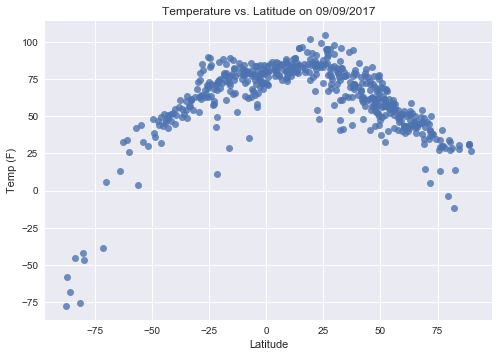

In [29]:
# create a plot for temp vs. lat, save a .png in output folder and show plot
sns.regplot(x = "Latitude", y = "Temp (F)", 
            data = rand_cities_df, fit_reg=False).set_title("Temperature vs. Latitude on 09/09/2017")

plt.savefig("output/temp_lat.png")

plt.show()

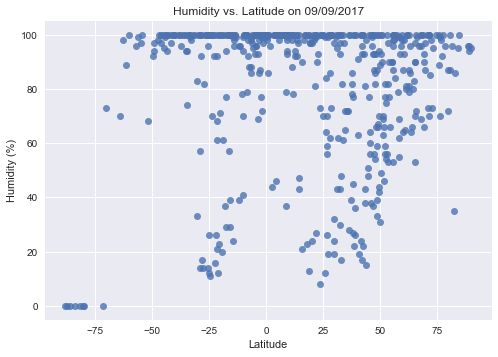

In [30]:
# create a plot for humidity vs. lat, save a .png in output folder and show plot
sns.regplot(x = "Latitude", y = "Humidity (%)", 
            data = rand_cities_df, fit_reg=False).set_title("Humidity vs. Latitude on 09/09/2017")

plt.savefig("output/humid_lat.png")

plt.show()

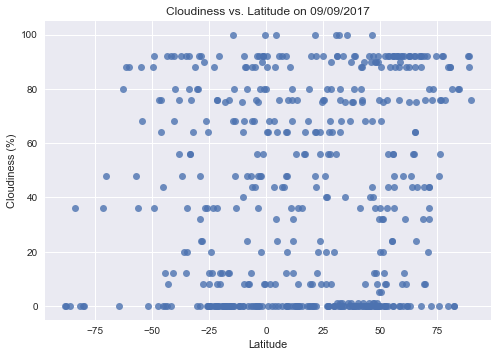

In [31]:
# create a plot for cloudiness vs. lat, save a .png in output folder and show plot
sns.regplot(x = "Latitude", y = "Cloudiness (%)", 
            data = rand_cities_df, fit_reg=False).set_title("Cloudiness vs. Latitude on 09/09/2017")

plt.savefig("output/cloud_lat.png")

plt.show()

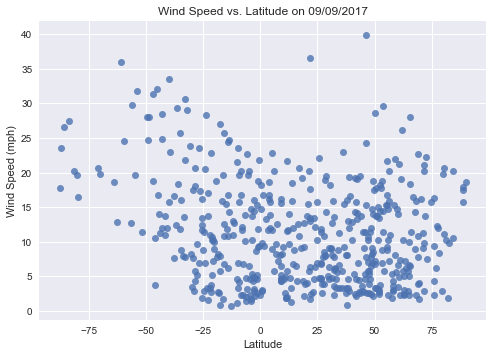

In [32]:
# create a plot for wind speed vs. lat, save a .png in output folder and show plot
sns.regplot(x = "Latitude", y = "Wind Speed (mph)", 
            data = rand_cities_df, fit_reg=False).set_title("Wind Speed vs. Latitude on 09/09/2017")

plt.savefig("output/wind_lat.png")

plt.show()